# Processamento digite de imagens

<h3>Primeiro deverá ser importado as bibliotecas que serão uteis</h3>
<p> O pyplot é usado para exibir imagens e gráficos </p>

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from skimage import io

In [3]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.299 * r + 0.587 * g + 0.114 * b

    return gray

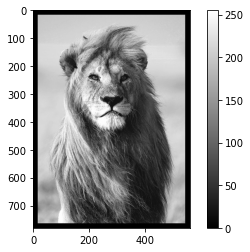

In [12]:
img = io.imread('gatinho.jpg')

plt.imshow(img, cmap='gray')
plt.colorbar()

## Inversão de cor
Para inverter as cores podemos apenas subtrais o valor do pixel de 255

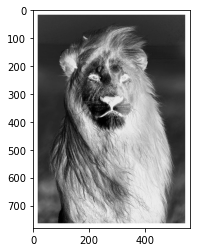

In [5]:
# Função inverte cores
row, col, color = img.shape

for i in range(row):
    for j in range(col):
        img[i, j] = 255 - img[i, j]
plt.imshow(img, cmap='gray')
row, col, color = img.shape

## Histograma
Para gerar o histograma lemos todos os pixes e mapeamos num array para em seguida gerar o gráfico

In [7]:
def gerar_histograma():
    histo = {}
    for i in range(256): # Inicializando o dict
        histo[i] = 0

    for i in range(row):
        for j in range(col):
            histo[img[i, j, 1]] = histo[img[i, j, 1]] + 1
    plt.bar(histo.keys(),histo.values())
    plt.show()

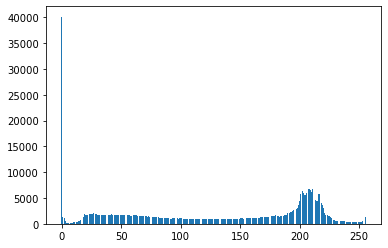

In [8]:
gerar_histograma()

## Logaritmica
Nessa função é aplicada a formula abaixo para cada pixel com base no fator dado pelo usuário e o esperado é que ela deixe a foto mais clara

5


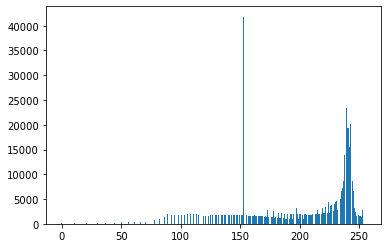

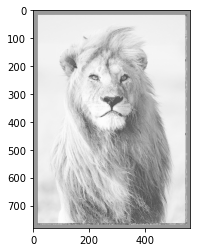

In [9]:
# Logaritmica
from math import log

fator = float(input())

for i in range(row):
    for j in range(col):
        r, g, b = img[i,j,0], img[i,j,1], img[i,j,2]
        
        img[i,j,0] = (255/log(1+255/fator))*log((1+r)/fator)
        img[i,j,1] = (255/log(1+255/fator))*log((1+g)/fator)
        img[i,j,2] = (255/log(1+255/fator))*log((1+b)/fator)
gerar_histograma()
plt.imshow(img, cmap='gray')

## Exponencial
Nessa função é aplicada a formula abaixo para cada pixel com base no fator dado pelo usuário e o esperado é que ela deixe a foto mais escura 

30


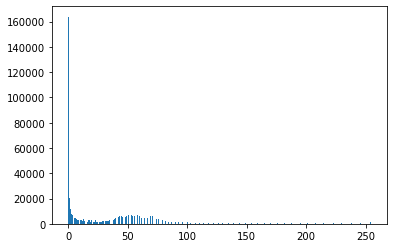

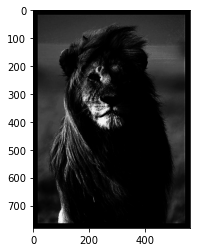

In [11]:
# Exponencial
from math import exp

fator = float(input())

for i in range(row):
    for j in range(col):
        aux = 255/fator
        r, g, b = img[i,j,0]/fator, img[i,j,1]/fator, img[i,j,2]/fator
        
        img[i,j,0] = (255/exp(aux))*(exp(r)-1)
        img[i,j,1] = (255/exp(aux))*(exp(g)-1)
        img[i,j,2] = (255/exp(aux))*(exp(b)-1)
gerar_histograma()
plt.imshow(img, cmap='gray')

# Equalizando
Processo para tentar deixar os pixels todos de forma igualmente distribuidos

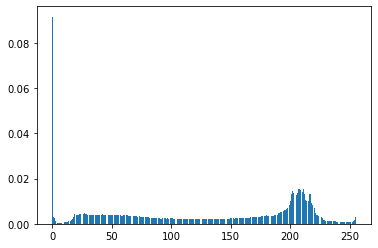

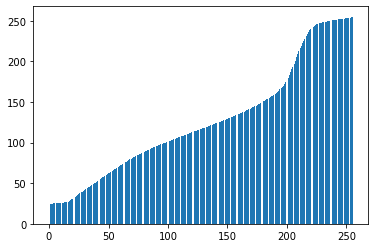

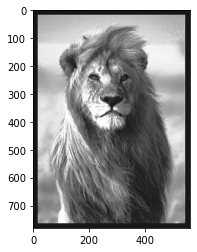

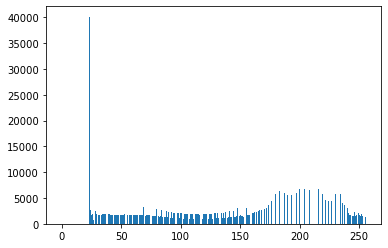

In [13]:
# Equalizar
def equalizar():
    histo = {}
    for i in range(256): 
        histo[i] = 0

    # Criando o histograma
    for i in range(row):
        for j in range(col):
            histo[img[i, j, 1]] = histo[img[i, j, 1]] + 1
            
    totPixels = img.shape[0]*img.shape[1]
    histoProb = {}
    
    # Criando o histograma probabilistico
    for i in range(0, 256):
        histoProb[i] = histo[i] / totPixels
        
    plt.bar(histoProb.keys(), histoProb.values())
    plt.show()
    
    # Probabilidade acumulativa
    acc = {}
    sumProb = 0
    
    for i in range(0, 256):
        if i == 0:
            pass
        else: 
            sumProb += histoProb[i-1]
        acc[i] = 255*(histoProb[i] + sumProb)
        
    plt.bar(acc.keys(), acc.values())
    plt.show()
    
    # Equalizando
    for i in range(row):
        for j in range(col):
            img[i, j, 0] = acc[img[i, j, 0]]
            img[i, j, 1] = acc[img[i, j, 1]]
            img[i, j, 2] = acc[img[i, j, 2]]
    plt.imshow(img)
    plt.show()
    gerar_histograma()
equalizar()